<a href="https://colab.research.google.com/github/Rajeswari-G/The-Intern-Academy_Machine-learning-Internship-/blob/main/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*IMPORTING LIBRARIES*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

*LOAD THE DATASET*

In [2]:
df=pd.read_csv('Titanic.csv')
df.head(10)

Unnamed: 0  PassengerId  Survived  ...     Frae Cabin Embarked
0         NaN            1         0  ...   7.2500   NaN        S
1         NaN            2         1  ...  71.2833   C85        C
2         NaN            3         1  ...   7.9250   NaN        S
3         NaN            4         1  ...  53.1000  C123        S
4         NaN            5         0  ...   8.0500   NaN        S
5         NaN            6         0  ...   8.4583   NaN        Q
6         NaN            7         0  ...  51.8625   E46        S
7         NaN            8         0  ...  21.0750   NaN        S
8         NaN            9         1  ...  11.1333   NaN        S
9         NaN           10         1  ...  30.0708   NaN        C

[10 rows x 13 columns]

In [3]:
df.describe()

Unnamed: 0  PassengerId    Survived  ...       SibSp       Parch        Frae
count         0.0   891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean          NaN   446.000000    0.383838  ...    0.523008    0.381594   32.204208
std           NaN   257.353842    0.486592  ...    1.102743    0.806057   49.693429
min           NaN     1.000000    0.000000  ...    0.000000    0.000000    0.000000
25%           NaN   223.500000    0.000000  ...    0.000000    0.000000    7.910400
50%           NaN   446.000000    0.000000  ...    0.000000    0.000000   14.454200
75%           NaN   668.500000    1.000000  ...    1.000000    0.000000   31.000000
max           NaN   891.000000    1.000000  ...    8.000000    6.000000  512.329200

[8 rows x 8 columns]

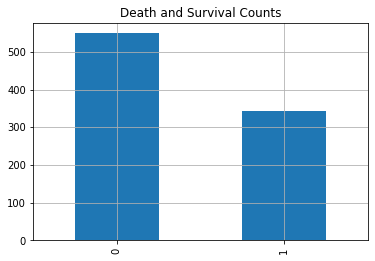

In [4]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival Counts',grid=True)
plt.show()

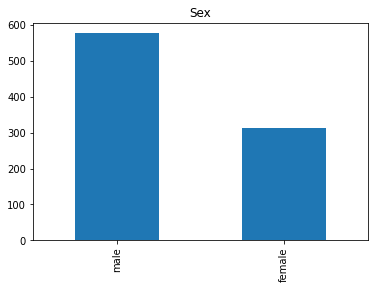

In [5]:
df['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.show()

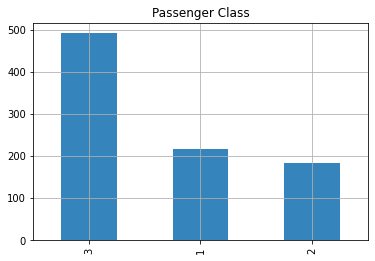

In [6]:
df['Pclass'].value_counts().plot(kind='bar', title='Passenger Class',alpha=0.90,grid=True)
plt.show()

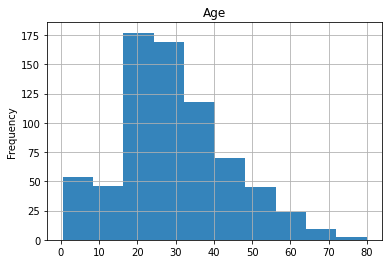

In [7]:
df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()

*PASSENGER CLASS*

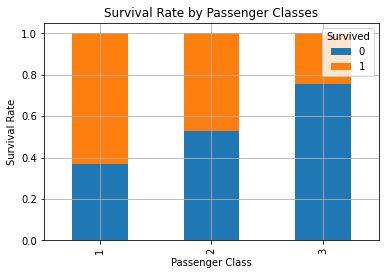

In [8]:
rel_1=pd.crosstab(df['Pclass'],df['Survived'])
rel_1_normalize = rel_1.div(rel_1.sum(1).astype(float), axis=0)
rel_1_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

*SEX*

In [9]:
sexes = sorted(df['Sex'].unique())
genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
df['Sex_Val'] = df['Sex'].map(genders_mapping).astype(int)
df.head(10)

Unnamed: 0  PassengerId  Survived  Pclass  ...     Frae Cabin  Embarked  Sex_Val
0         NaN            1         0       3  ...   7.2500   NaN         S        1
1         NaN            2         1       1  ...  71.2833   C85         C        0
2         NaN            3         1       3  ...   7.9250   NaN         S        0
3         NaN            4         1       1  ...  53.1000  C123         S        0
4         NaN            5         0       3  ...   8.0500   NaN         S        1
5         NaN            6         0       3  ...   8.4583   NaN         Q        1
6         NaN            7         0       1  ...  51.8625   E46         S        1
7         NaN            8         0       3  ...  21.0750   NaN         S        1
8         NaN            9         1       3  ...  11.1333   NaN         S        0
9         NaN           10         1       2  ...  30.0708   NaN         C        0

[10 rows x 14 columns]

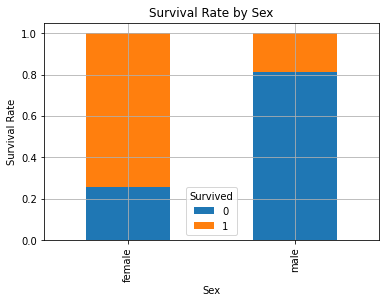

In [10]:
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize=rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True) 
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

In [11]:
# Get the unique values of Pclass:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [12]:
for i in passenger_classes:
        print ('M : ',i ,len(df[(df['Sex'] == 'male')  & (df['Pclass'] == i)]))
        print ('F : ',i ,len(df[(df['Sex'] =='female') & (df['Pclass'] == i)]))
male=df[df['Sex']=='male']
female=df[df['Sex']=='female']

M :  1 122
F :  1 94
M :  2 108
F :  2 76
M :  3 347
F :  3 144


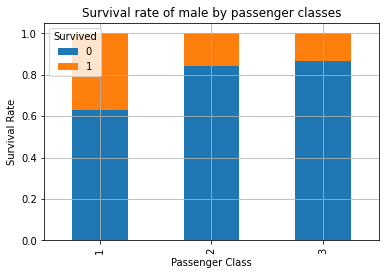

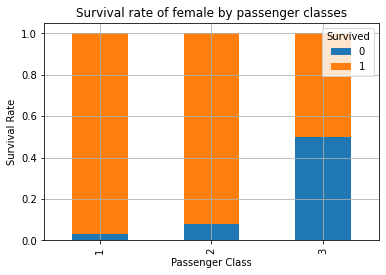

In [13]:
male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize=male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival rate of male by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize=female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival rate of female by passenger classes',stacked='True',grid='True')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

In [14]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())

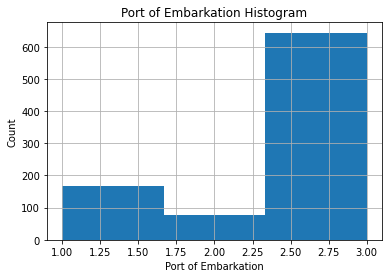

In [15]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

*EMBARKED*

In [16]:
df[df['Embarked'].isnull()]

Unnamed: 0  PassengerId  Survived  ...  Embarked Sex_Val Embarked_Value
61          NaN           62         1  ...       NaN       0            NaN
829         NaN          830         1  ...       NaN       0            NaN

[2 rows x 15 columns]

In [17]:
df['Embarked_Value']=df['Embarked']
df.head(10)

Unnamed: 0  PassengerId  Survived  ...  Embarked Sex_Val Embarked_Value
0         NaN            1         0  ...         S       1              S
1         NaN            2         1  ...         C       0              C
2         NaN            3         1  ...         S       0              S
3         NaN            4         1  ...         S       0              S
4         NaN            5         0  ...         S       1              S
5         NaN            6         0  ...         Q       1              Q
6         NaN            7         0  ...         S       1              S
7         NaN            8         0  ...         S       1              S
8         NaN            9         1  ...         S       0              S
9         NaN           10         1  ...         C       0              C

[10 rows x 15 columns]

In [18]:
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)

In [19]:
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0, nan]

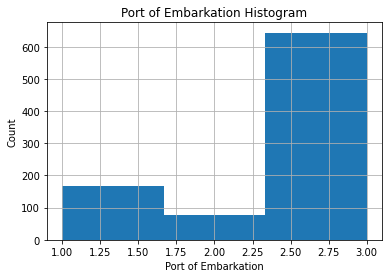

In [20]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('Port of Embarkation Histogram')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

In [21]:
df['Embarked_Value']=df['Embarked_Value'].fillna(3)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0]

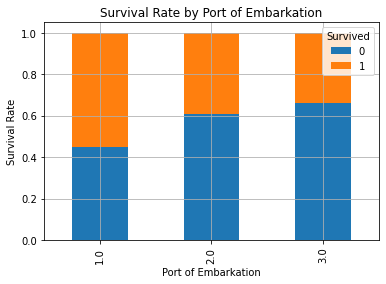

In [22]:
embarked_rel=pd.crosstab(df['Embarked_Value'],df['Survived'])
embarked_rel_normalize=embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate by Port of Embarkation',grid='True',stacked='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

*AGE*

In [23]:
df[df['Age'].isnull()].head(10)

Unnamed: 0  PassengerId  Survived  ...  Embarked Sex_Val Embarked_Value
5          NaN            6         0  ...         Q       1            2.0
17         NaN           18         1  ...         S       1            3.0
19         NaN           20         1  ...         C       0            1.0
26         NaN           27         0  ...         C       1            1.0
28         NaN           29         1  ...         Q       0            2.0
29         NaN           30         0  ...         S       1            3.0
31         NaN           32         1  ...         C       0            1.0
32         NaN           33         1  ...         Q       0            2.0
36         NaN           37         1  ...         C       1            1.0
42         NaN           43         0  ...         C       1            1.0

[10 rows x 15 columns]

In [24]:
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex_Val'],df['Pclass']]).apply(lambda x: x.fillna(x.median()))
df['Age_complete'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_complete, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


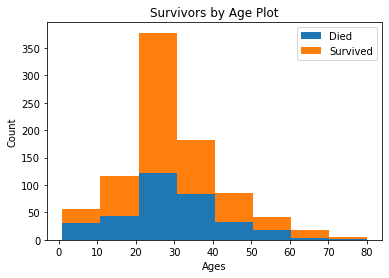

In [25]:
age_survived=df[df['Survived']==1]['Age_complete']
age_not_survived = df[df['Survived'] == 0]['Age_complete']
max_age=max(df['Age_complete'])

plt.hist([age_survived,age_not_survived],bins=8,range=(1, max_age),stacked=True)
plt.title('Survivors by Age Plot')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.legend(('Died', 'Survived'), loc='best')
plt.show()

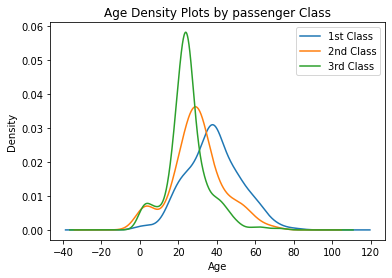

In [26]:
for i in passenger_classes :
        df.Age_complete[df.Pclass==i].plot(kind='density')
plt.title('Age Density Plots by passenger Class')
plt.xlabel('Age')
plt.legend(('1st Class', '2nd Class', '3rd Class'), loc='best')
plt.show()

*FAMILY SIZE*

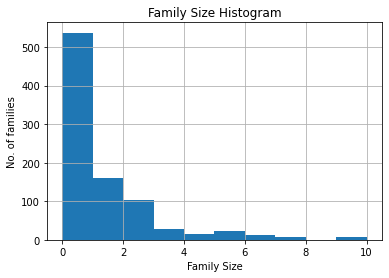

In [27]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].hist(bins=10)
plt.xlabel('Family Size')
plt.ylabel('No. of families')
plt.title('Family Size Histogram')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


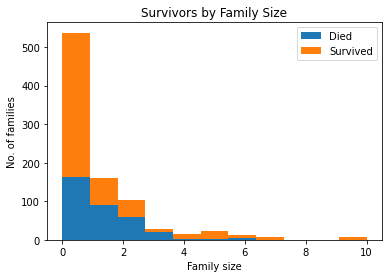

In [28]:
family_sizes=sorted(df['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df[df['Survived']==1]['Family_Size']
family_size_not_survived=df[df['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins=family_sizes_max+1,range=(0, family_sizes_max),stacked=True)
plt.legend(('Died', 'Survived'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors by Family Size')
plt.show()

**Data for machine learning**

In [29]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]
df=df.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)
df.head(10)

Unnamed: 0  Survived  Pclass     Frae  Sex_Val  Age_complete  Family_Size
0         NaN         0       3   7.2500        1          22.0            1
1         NaN         1       1  71.2833        0          38.0            1
2         NaN         1       3   7.9250        0          26.0            0
3         NaN         1       1  53.1000        0          35.0            1
4         NaN         0       3   8.0500        1          35.0            0
5         NaN         0       3   8.4583        1          25.0            0
6         NaN         0       1  51.8625        1          54.0            0
7         NaN         0       3  21.0750        1           2.0            4
8         NaN         1       3  11.1333        0          27.0            2
9         NaN         1       2  30.0708        0          14.0            1

In [30]:
def data_prep(df_given):
    sexes = sorted(df_given['Sex'].unique())
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
    df_given['Sex_Val'] = df_given['Sex'].map(genders_mapping).astype(int)
    df_given['Embarked_Value']=df_given['Embarked']
    df_given['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
    df_given['Embarked_Value']=df_given['Embarked_Value'].fillna(3)
    if len(df_given[df_given['Fare'].isnull()] > 0):
        avg_fare = df_given['Fare'].mean()
        df_given['Fare'].fillna(avg_fare, inplace=True)
    df_given['Age_complete'] = df_given['Age']
    df_given['Age_complete']=df_given['Age_complete'].groupby([df_given['Sex_Val'],df_given['Pclass']]).apply(lambda x: x.fillna(x.median()))
    df_given['Family_Size'] = df_given['SibSp'] + df_given['Parch']
    df_given=df_given.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)
    
    return df_given